In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grocery_data = pd.read_csv('MMA_860_Grocery_Data.csv', header='infer', index_col='Obs') 
grocery_data.head()

,Grocery_Bill,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet
Obs,,,,,,,,,
1,$357.73,2,"$142,141",4,3,15,0,2,1
2,$276.84,2,"$145,916",2,1,4,0,0,0
3,$197.92,1,"$86,185",1,2,14,0,0,0
4,$315.75,2,"$145,998",3,1,8,0,1,0
5,$202.89,1,"$79,341",1,2,19,1,0,0


In [3]:
grocery_data.describe()

,N_Adults,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.521000,2.135000,1.902000,6.609000,0.063000,0.614000,0.159000
std,0.577835,1.357431,0.901781,5.419916,0.243085,0.979778,0.365859
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,3.000000,10.000000,0.000000,1.000000,0.000000
max,3.000000,6.000000,3.000000,20.000000,1.000000,3.000000,1.000000


In [4]:
grocery_data.dtypes

Grocery_Bill         object
N_Adults              int64
Family_Income        object
Family_Size           int64
N_Vehicles            int64
Distance_to_Store     int64
Vegetarian            int64
N_Children            int64
Family_Pet            int64
dtype: object

In [5]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grocery_Bill       1000 non-null   object
 1   N_Adults           1000 non-null   int64 
 2   Family_Income      1000 non-null   object
 3   Family_Size        1000 non-null   int64 
 4   N_Vehicles         1000 non-null   int64 
 5   Distance_to_Store  1000 non-null   int64 
 6   Vegetarian         1000 non-null   int64 
 7   N_Children         1000 non-null   int64 
 8   Family_Pet         1000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 78.1+ KB


# Data cleaning

In [6]:
def remove_dollar_sign(s):
    return s.replace("$","")
grocery_data['Grocery_Bill'].head()

Obs
1    $357.73 
2    $276.84 
3    $197.92 
4    $315.75 
5    $202.89 
Name: Grocery_Bill, dtype: object

In [7]:
grocery_data['Grocery_Bill'] = grocery_data['Grocery_Bill'].map(remove_dollar_sign).astype('float64')

In [8]:
grocery_data['Grocery_Bill'].head()

Obs
1    357.73
2    276.84
3    197.92
4    315.75
5    202.89
Name: Grocery_Bill, dtype: float64

In [9]:
def remove_comma(s):
    return s.replace(",","")
grocery_data['Family_Income'] = grocery_data['Family_Income'].map(
    remove_dollar_sign).map(remove_comma).astype('int64')
grocery_data['Family_Income'].head()

Obs
1    142141
2    145916
3     86185
4    145998
5     79341
Name: Family_Income, dtype: int64

In [10]:
grocery_data[(grocery_data['N_Children'] == 0)].head()

,Grocery_Bill,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet
Obs,,,,,,,,,
2,276.84,2,145916,2,1,4,0,0,0
3,197.92,1,86185,1,2,14,0,0,0
5,202.89,1,79341,1,2,19,1,0,0
8,232.51,1,88371,1,2,8,0,0,0
9,146.32,1,75942,1,3,8,0,0,0


In [11]:
filtered_grocery_data = grocery_data[
    (grocery_data['N_Children'] == 0) & (grocery_data[
        'N_Vehicles'] == 0)]

filtered_grocery_data.head()

,Grocery_Bill,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet
Obs,,,,,,,,,
10,125.05,1,70298,1,0,2,0,0,0
28,121.66,1,74193,1,0,3,0,0,0
35,193.08,1,80541,1,0,8,0,0,1
60,184.60,1,82113,1,0,5,0,0,1
74,220.75,1,72413,1,0,13,0,0,1


In [12]:
arranged_grocery_data = grocery_data.sort_values(
    'Grocery_Bill', ascending=False)

arranged_grocery_data.head()

,Grocery_Bill,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet
Obs,,,,,,,,,
256,524.07,3,143977,5,1,16,0,2,0
983,508.41,3,138149,6,1,2,0,3,0
839,480.03,3,130824,3,1,2,0,0,1
401,465.81,2,141731,5,0,15,0,3,0
789,461.53,2,120943,4,2,5,0,2,0


In [13]:
selected_grocery_data = grocery_data[
    ['Grocery_Bill','Family_Income','Family_Size']]
selected_grocery_data.head()

,Grocery_Bill,Family_Income,Family_Size
Obs,,,
1,357.73,142141,4
2,276.84,145916,2
3,197.92,86185,1
4,315.75,145998,3
5,202.89,79341,1


In [14]:
grocery_data = grocery_data.assign(
    Percentage_Income = grocery_data['Grocery_Bill'] 
    / grocery_data['Family_Income'])

grocery_data[['Grocery_Bill','Family_Income','Percentage_Income']].head()

,Grocery_Bill,Family_Income,Percentage_Income
Obs,,,
1,357.73,142141,0.002517
2,276.84,145916,0.001897
3,197.92,86185,0.002296
4,315.75,145998,0.002163
5,202.89,79341,0.002557


# Exploratory Data Analysis

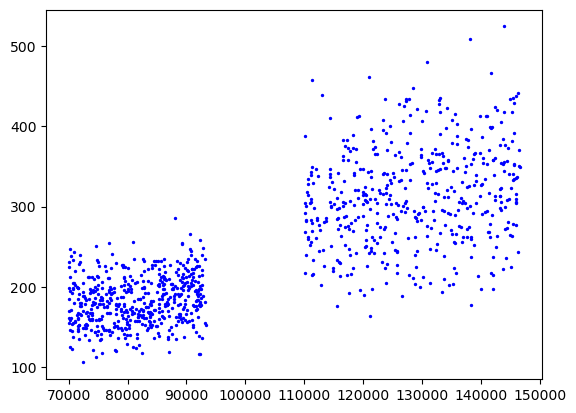

In [15]:
plt.scatter(grocery_data['Family_Income'],
    grocery_data['Grocery_Bill'],s=2,c='blue')

plt.show()

<Figure size 640x480 with 0 Axes>

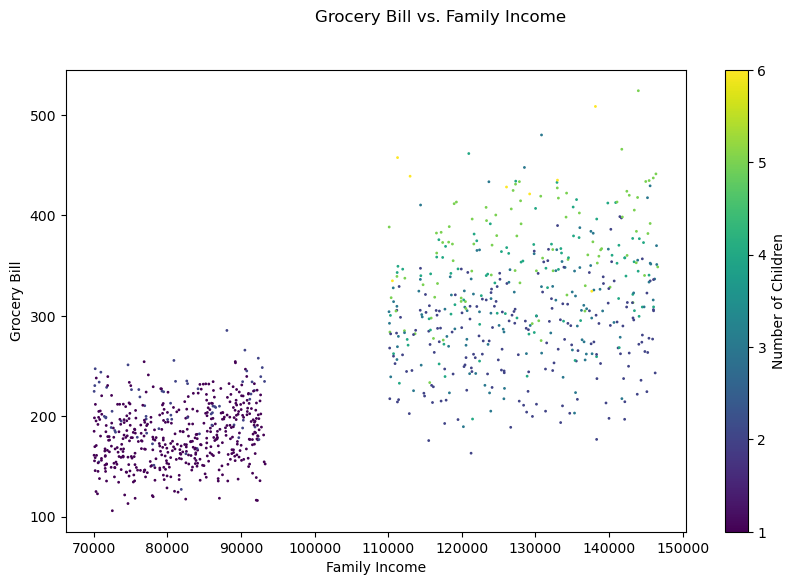

In [16]:
fig = plt.figure()
fig = plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    grocery_data['Family_Income'],grocery_data['Grocery_Bill'],
    s=1,c=grocery_data['Family_Size'])
fig.suptitle('Grocery Bill vs. Family Income')
plt.ylabel("Grocery Bill")
plt.xlabel("Family Income")
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Number of Children')
plt.show()

# Train entire data set to see performance

In [17]:
Y_train = grocery_data['Grocery_Bill']

In [18]:
X_train = grocery_data.drop(['Grocery_Bill','Percentage_Income'], axis=1)
X_train[0:4] 

,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet
Obs,,,,,,,,
1,2,142141,4,3,15,0,2,1
2,2,145916,2,1,4,0,0,0
3,1,86185,1,2,14,0,0,0
4,2,145998,3,1,8,0,1,0


In [19]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) 

lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit()

lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Grocery_Bill   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     740.1
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:01:06   Log-Likelihood:                -4900.2
No. Observations:                1000   AIC:                             9816.
Df Residuals:                     992   BIC:                             9856.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                23.3057      5.715      4.078      0.000      12.091      34.520
N_Adults             26.8743      2.637     10.193      0.000      21.700      32.048
Family_Income         0.0009   8.77e-05     10.762      0.000       0.001       0.001
Family_Size          27.6127      1.277     21.619      0.000      25.106      30.119
N_Vehicles           -0.8388      1.149     -0.730      0.465      -3.093       1.416
Distance_to_Store     3.8897      0.191     20.391      0.000       3.515       4.264
Vegetarian           -7.8462      4.254     -1.844      0.065     -16.194       0.501
N_Children            0.7384      1.608      0.459      0.646      -2.416       3.893
Family_Pet            1.6358      2.827      0.579      0.563      -3.913       7.184
==============================================================================
Omnibus:                       51.552   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.112
Skew:                           0.081   Prob(JB):                     4.23e-38
Kurtosis:                       5.026   Cond. No.                     3.96e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
X_train = grocery_data.drop(['N_Vehicles','N_Children','Family_Pet','Vegetarian','Grocery_Bill','Percentage_Income'], axis=1)
X_train[0:4]

,N_Adults,Family_Income,Family_Size,Distance_to_Store
Obs,,,,
1,2,142141,4,15
2,2,145916,2,4
3,1,86185,1,14
4,2,145998,3,8


In [21]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) 

lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit()

lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Grocery_Bill   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1292.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:01:06   Log-Likelihood:                -4902.3
No. Observations:                1000   AIC:                             9815.
Df Residuals:                     995   BIC:                             9839.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                21.6549      5.244      4.129      0.000      11.364      31.946
N_Adults             26.0491      4.179      6.234      0.000      17.849      34.249
Family_Income         0.0009   8.77e-05     10.734      0.000       0.001       0.001
Family_Size          28.4320      1.215     23.395      0.000      26.047      30.817
Distance_to_Store     3.8904      0.191     20.384      0.000       3.516       4.265
==============================================================================
Omnibus:                       52.010   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.096
Skew:                           0.087   Prob(JB):                     1.57e-38
Kurtosis:                       5.037   Cond. No.                     5.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn.linear_model import LinearRegression
lm_sklearn = LinearRegression().fit(X_train, Y_train) 
print("Intercept = ",lm_sklearn.intercept_)
print("Model coefficients = ", lm_sklearn.coef_)
print("R^2 =",lm_sklearn.score(X_train,Y_train))

Intercept =  21.654898708201642
Model coefficients =  [2.60491442e+01 9.41605905e-04 2.84319768e+01 3.89037244e+00]
R^2 = 0.8385844269209555


In [23]:
print("R-Squared:", lm_sklearn.score(X_train, Y_train))

R-Squared: 0.8385844269209555


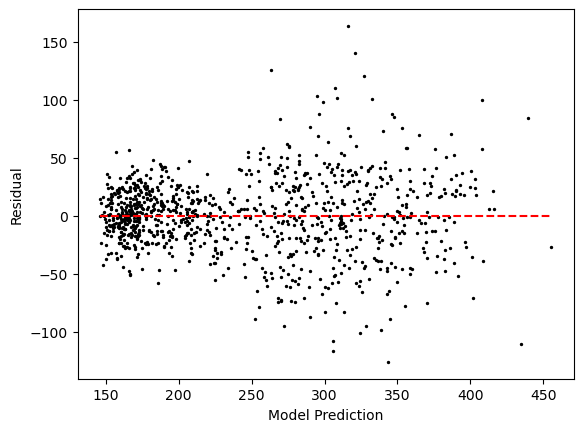

In [24]:
#Residuals calculated by definition above.
predicted_y = lm_sklearn.predict(X_train)
#Note we can perform element-wise subtraction between arrays like so
residuals = Y_train - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

In [25]:
print('Mean of Residuals:',residuals.mean())

Mean of Residuals: -3.5981884138891474e-14


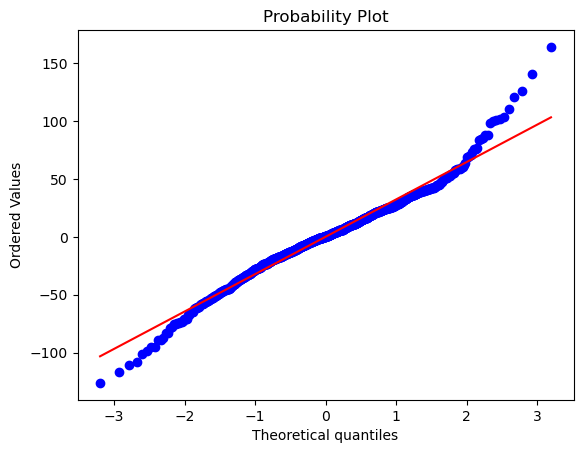

In [26]:
import scipy.stats as stats

'''
Boilerplate code for creating a Normal Q-Q plot. The first two lines declare 
a figure and a subplot. This is an alternate way to output plots which allows 
for more than one plot per output.
'''
fig = plt.figure()
ax = fig.add_subplot(111)

'''
Scipy.Stats has a built-in function for generating this type of plot. This 
function takes three arguments: the measurement being checked (residuals), 
the distribution we are checking against (normal in this case), and the plot 
to plot it to.
'''
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

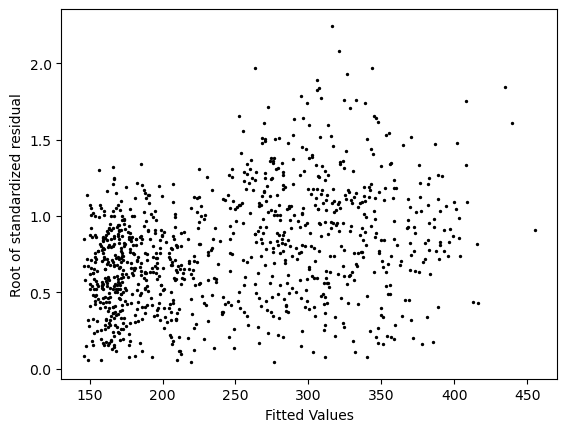

In [27]:
from sklearn.preprocessing import StandardScaler

residuals_array = residuals.to_numpy().reshape(-1, 1)

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals_array)
norm_residuals = scaler.transform(residuals_array)

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

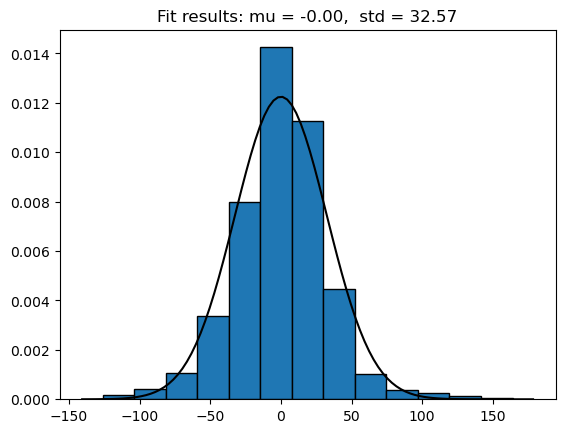

In [28]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

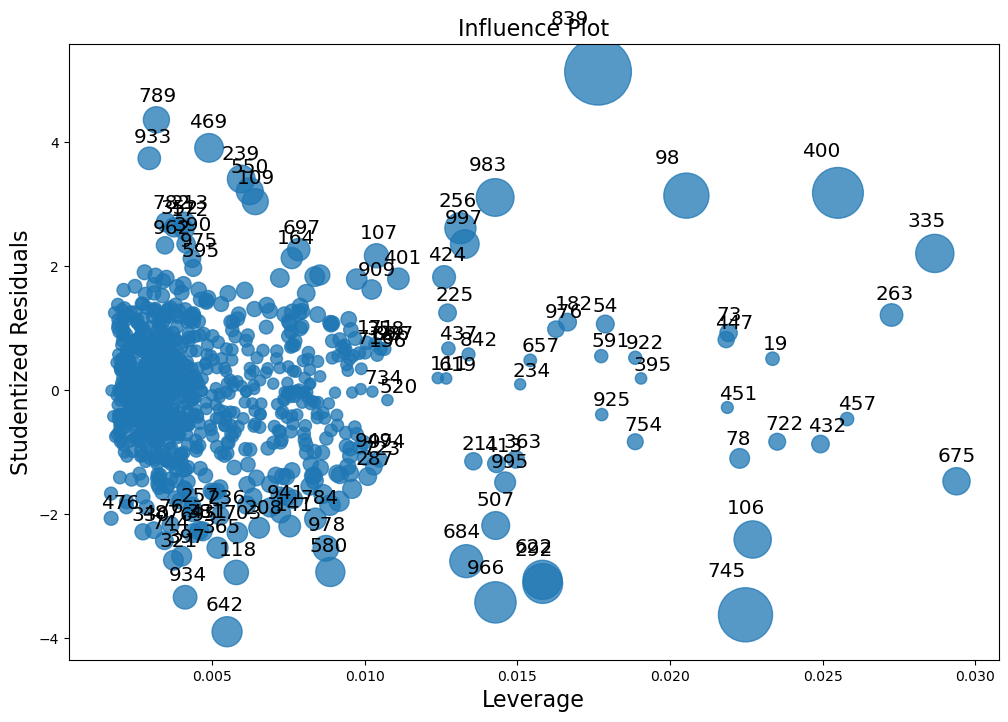

In [29]:
#In a similar fashion to how the QQ plot was built, this plot can be generated.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, ax=ax, criterion="cooks")
plt.show()

In [30]:
#Residuals calculated by definition above.
predicted_y = lm_sklearn.predict(X_train)
#Note we can perform element-wise subtraction between arrays like so
residuals = Y_train - predicted_y

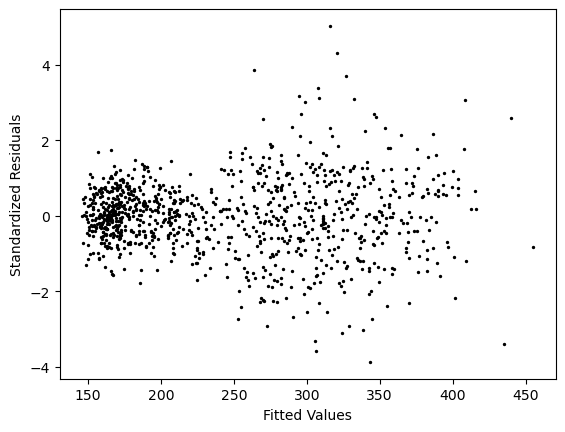

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

residuals_array = residuals.to_numpy().reshape(-1, 1)

scaler = StandardScaler().fit(residuals_array)
norm_residuals = scaler.transform(residuals_array)


# Plot and take the root and absolute values of the norms
plt.scatter(lm_sklearn.predict(X_train),norm_residuals,c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp = het_breuschpagan(lm.resid,lm.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 147.81560473930577, 'LM-Test p-value': 5.981034634200859e-31, 'F-Statistic': 43.14691970820957, 'F-Test p-value': 2.0551049841527627e-33}


# This time will create test and train data set

In [45]:
grocery_data.head()

,Grocery_Bill,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet,Percentage_Income
Obs,,,,,,,,,,
1,357.73,2,142141,4,3,15,0,2,1,0.002517
2,276.84,2,145916,2,1,4,0,0,0,0.001897
3,197.92,1,86185,1,2,14,0,0,0,0.002296
4,315.75,2,145998,3,1,8,0,1,0,0.002163
5,202.89,1,79341,1,2,19,1,0,0,0.002557


In [46]:
y = grocery_data['Grocery_Bill']
y[0:4] # Display first 4 values of the Y vector

Obs
1    357.73
2    276.84
3    197.92
4    315.75
Name: Grocery_Bill, dtype: float64

In [47]:
X = grocery_data.drop(columns=['Grocery_Bill'])
X[0:4]

,N_Adults,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet,Percentage_Income
Obs,,,,,,,,,
1,2,142141,4,3,15,0,2,1,0.002517
2,2,145916,2,1,4,0,0,0,0.001897
3,1,86185,1,2,14,0,0,0,0.002296
4,2,145998,3,1,8,0,1,0,0.002163


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=0.7,random_state=0)

In [49]:
print(f'X_train shape: {X_train.shape[0]}, y_train shape: {y_train.shape[0]}, X_test shape: {X_test.shape[0]}, y_test shape: {y_test.shape[0]}')

X_train shape: 700, y_train shape: 700, X_test shape: 300, y_test shape: 300


In [50]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_sm.astype(float)).fit() 
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Grocery_Bill   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5223.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:15:53   Log-Likelihood:                -2620.3
No. Observations:                 700   AIC:                             5259.
Df Residuals:                     691   BIC:                             5300.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -237.0301      3.867    -61.301      0.000    -244.622    -229.438
N_Adults             -0.8506      1.048     -0.812      0.417      -2.908       1.207
Family_Income         0.0023   3.67e-05     61.608      0.000       0.002       0.002
Family_Size           1.4400      0.571      2.523      0.012       0.320       2.561
N_Vehicles           -0.5219      0.426     -1.226      0.221      -1.358       0.314
Distance_to_Store    -0.1786      0.087     -2.044      0.041      -0.350      -0.007
Vegetarian           -1.0690      1.517     -0.705      0.481      -4.047       1.909
N_Children            2.2906      0.611      3.749      0.000       1.091       3.490
Family_Pet            0.1671      1.080      0.155      0.877      -1.953       2.287
Percentage_Income  1.048e+05   1304.262     80.383      0.000    1.02e+05    1.07e+05
==============================================================================
Omnibus:                       63.222   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.246
Skew:                          -0.641   Prob(JB):                     4.64e-22
Kurtosis:                       4.314   Cond. No.                     4.98e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
from sklearn.linear_model import LinearRegression
lm_sklearn = LinearRegression().fit(X_train, y_train) 
print("Intercept = ",lm_sklearn.intercept_) 
print("Model coefficients = ", lm_sklearn.coef_) 
print("R^2 =",lm_sklearn.score(X_train,y_train))


Intercept =  -237.03009208702196
Model coefficients =  [-8.50559663e-01  2.26361022e-03  1.44003654e+00 -5.21898480e-01
 -1.78564917e-01 -1.06897631e+00  2.29059621e+00  1.67050698e-01
  1.04840710e+05]
R^2 = 0.9837320933329525


In [52]:
Y_pred = lm_sklearn.predict(X_test)
Y_pred[0:4]

array([250.59294993, 284.76619598, 181.90479487, 349.4938286 ])

In [58]:
percent_errors = np.abs((y_test - Y_pred) / y_test) *100
percent_errors[0:4]

Obs
994     2.997513
860    13.375879
299     3.149870
554     3.406714
Name: Grocery_Bill, dtype: float64

In [59]:
print("Linear Model MAPE = ", np.mean(percent_errors), "%")

Linear Model MAPE =  3.4976789252950415 %


In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt

In [61]:
print("R^2:",lm_sklearn.score(X_train,y_train))
print("Mean Squared Error:", mean_squared_error(
    y_train, lm_sklearn.predict(X_train)))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_train,lm_sklearn.predict(X_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y_train,lm_sklearn.predict(X_train)))

R^2: 0.9837320933329525
Mean Squared Error: 104.44377261829324
Root Mean Squared Error: 10.219773608955007
Mean Absolute Error: 7.788973598158144


In [62]:
print("R^2:",lm_sklearn.score(X_test,y_test))
print("Mean Squared Error:", mean_squared_error(
    y_test, lm_sklearn.predict(X_test)))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_test,lm_sklearn.predict(X_test))))
print("Mean Absolute Error:",mean_absolute_error(
    y_test,lm_sklearn.predict(X_test))) 

R^2: 0.9832846460942624
Mean Squared Error: 115.00313407028487
Root Mean Squared Error: 10.723951420548532
Mean Absolute Error: 7.802552792214058


# Example of how to export prediction on unseen data, below is X_train prediction output

In [63]:

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(Y_pred, columns=['PredictedValue'])  # Assuming Y_pred is 1D

# Save the DataFrame to a CSV file
df.to_csv("Prediction of Grocery Bill.csv", index=False)